In [1]:
import vice
import numpy as np
import matplotlib.pyplot as plt

In [28]:
tau_sfh = 5
def sfh(t):
    return np.exp(-t/tau_sfh)

In [39]:
eta_factor = 1
from surp.src import yields

for ele in ["n", "o", "fe"]:
    vice.yields.ccsne.settings[ele] *= eta_factor
    vice.yields.sneia.settings[ele] *= eta_factor
    
vice.yields.ccsne.settings["o"] = 0.015
vice.yields.agb.settings["c"] = yields.amplified_yields("c", prefactor=3)

vice.yields.ccsne.settings["c"] = lambda z: 0.002 + 0.002 * (z/0.014)


model = vice.singlezone(func=sfh, mode="sfr", dt=0.01, elements=("n", "o", "fe", "c"), eta=1.5*eta_factor)
out = model.run(np.linspace(0, 13.2, 1321), overwrite=True, capture=True)

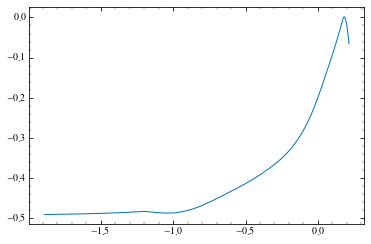

In [40]:
h = out.history
plt.plot(h["[o/h]"], h["[c/o]"])